In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Loading the csv file and adding the columns names to the dataframe
name = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week','native-country', 'class']
df = pd.read_csv('adult.data', names=name)


In [4]:
# Displaying the first 5five rows
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
# Displaying the information of the data such as datatype, counting for nonull etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Checking for missing values
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [7]:
# Summarizing key statistics for dataframe
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
from sklearn.preprocessing import LabelEncoder
# Encoding the label (sex) class to (salary)
enc = LabelEncoder()
df['sex'] = enc.fit_transform(df['sex'])
df['salary'] = enc.fit_transform(df['class'])


<Axes: xlabel='workclass', ylabel='count'>

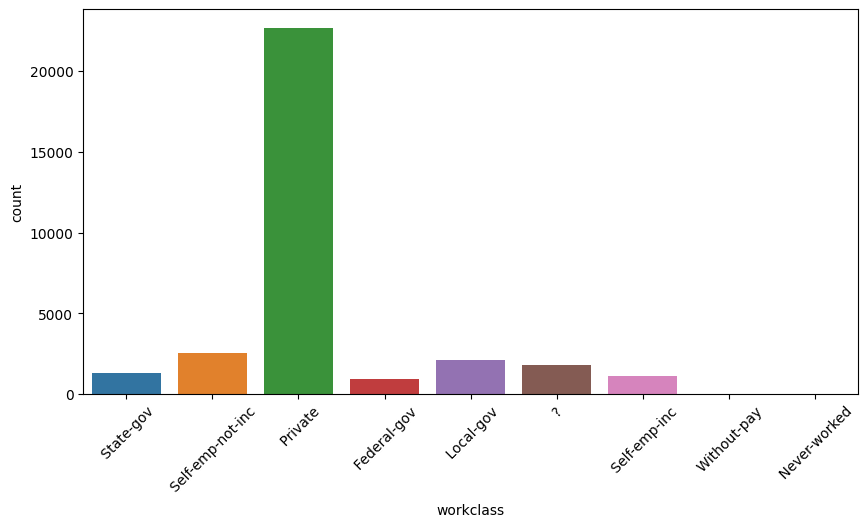

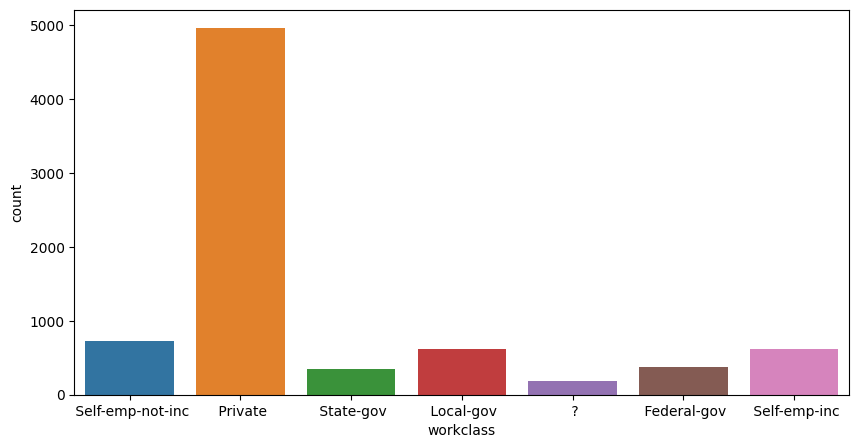

In [9]:
# Ploting the workclass
plt.figure(figsize=(10, 5))
sns.countplot(x='workclass', data=df, hue='workclass')
plt.xticks(rotation=45)

# Ploting were the workclass have greater than 50k salary
# Fitltiring out the dataframe only for salary greater than 50k
salary_50k = df[df['salary'] == 1]
plt.figure(figsize=(10, 5))
sns.countplot(x='workclass', data=salary_50k, hue='workclass')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, ' Prof-specialty'),
  Text(1, 0, ' Craft-repair'),
  Text(2, 0, ' Exec-managerial'),
  Text(3, 0, ' Adm-clerical'),
  Text(4, 0, ' Sales'),
  Text(5, 0, ' Other-service'),
  Text(6, 0, ' Machine-op-inspct'),
  Text(7, 0, ' ?'),
  Text(8, 0, ' Transport-moving'),
  Text(9, 0, ' Handlers-cleaners'),
  Text(10, 0, ' Farming-fishing'),
  Text(11, 0, ' Tech-support'),
  Text(12, 0, ' Protective-serv'),
  Text(13, 0, ' Priv-house-serv'),
  Text(14, 0, ' Armed-Forces')])

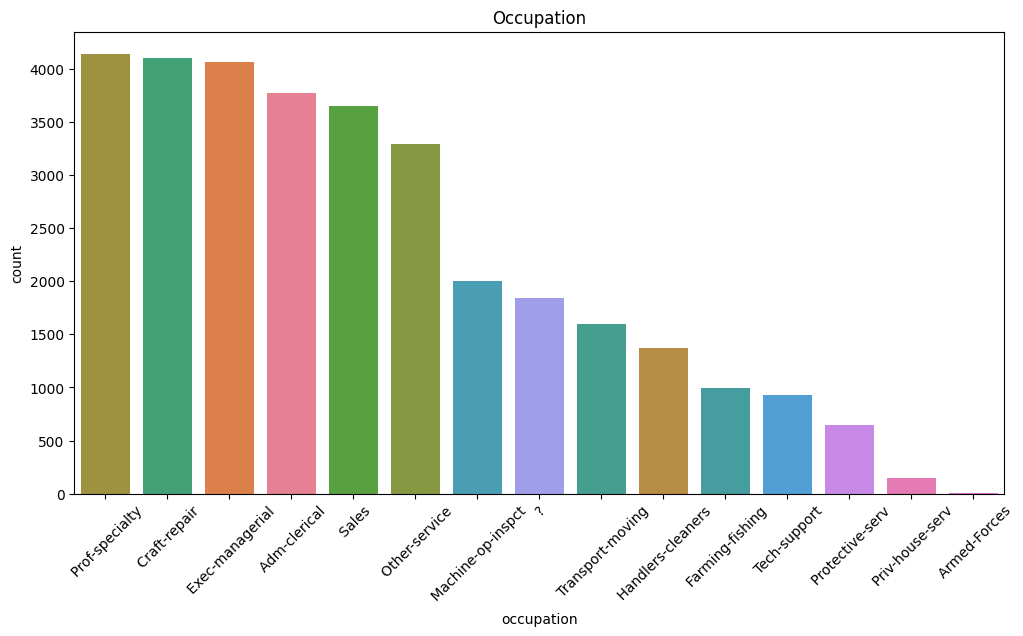

In [10]:
# Ploting the occupation
plt.figure(figsize=(12, 6))
sns.countplot(x='occupation', data=df, order=df['occupation'].value_counts().index[:20], hue='occupation')
plt.title('Occupation')
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Never-married'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Separated'),
  Text(4, 0, ' Widowed'),
  Text(5, 0, ' Married-spouse-absent'),
  Text(6, 0, ' Married-AF-spouse')])

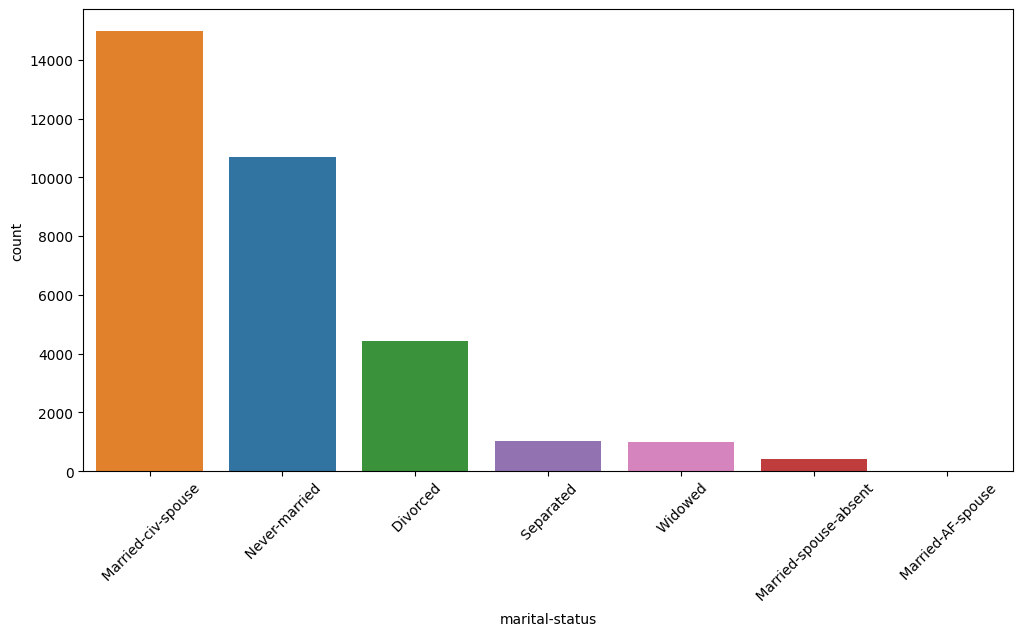

In [11]:

# Ploting the marital status
plt.figure(figsize=(12, 6))
sns.countplot(x='marital-status', data=df, order=df['marital-status'].value_counts().index, hue='marital-status')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Boxplot of hour worked per week')

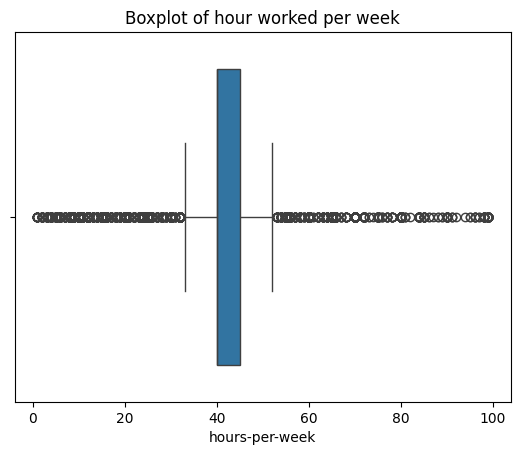

In [12]:
# Distribution of hour worked perweek
sns.boxplot(x='hours-per-week', data=df)
plt.title('Boxplot of hour worked per week')

Text(0.5, 1.0, 'Proportion of workclass categories')

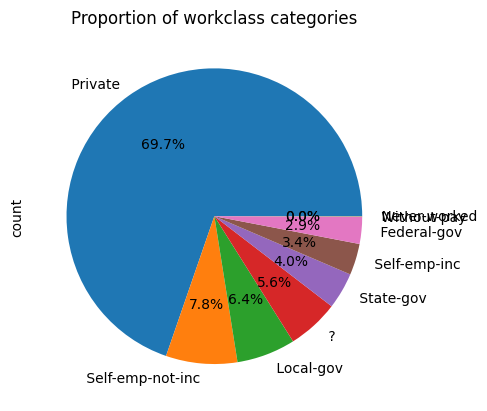

In [13]:
# Ploting the proportion of workclass categories with pie chart
df['workclass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of workclass categories')


Text(0.5, 1.0, 'Dist of The age')

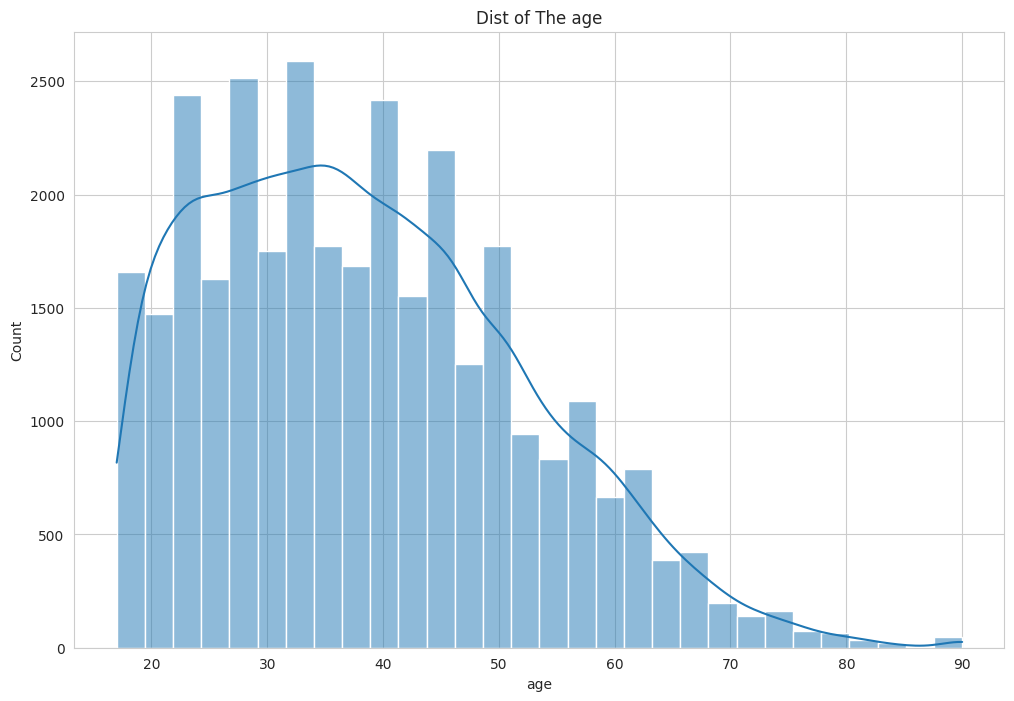

In [14]:
sns.set_style('whitegrid')
# Disribution of the age
plt.figure(figsize=(12, 8))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Dist of The age')

Text(0.5, 1.0, 'relationship : lessthan 50k salary')

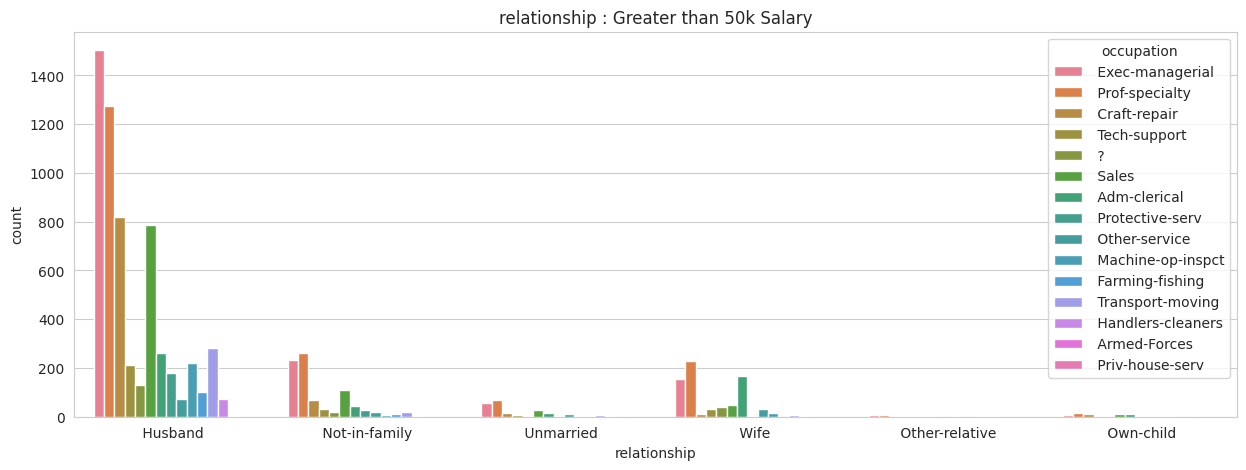

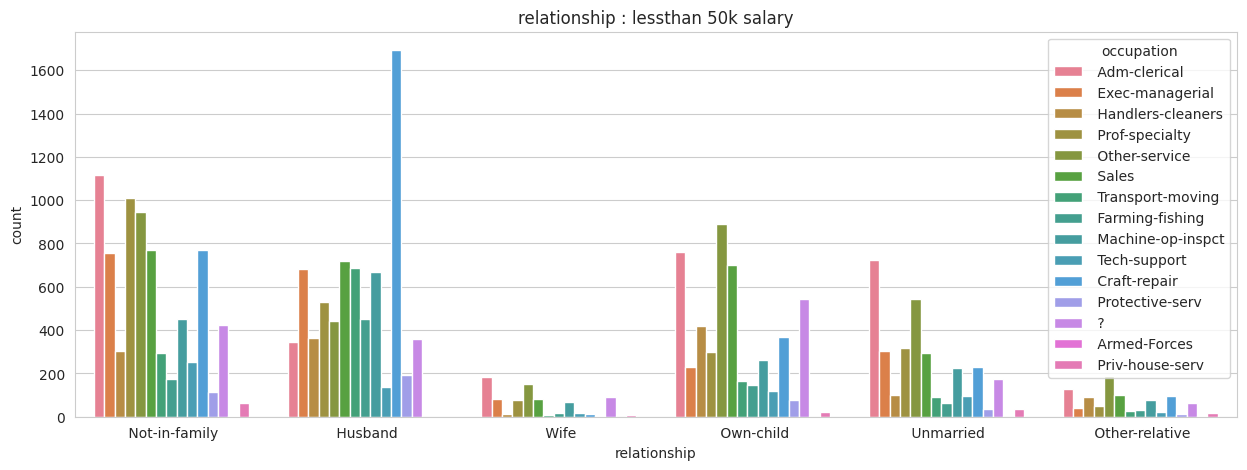

In [15]:
# Filtering the DataFrame to Include only rows where the salary is greater than 50k(salary == 1)
above_50k = df[df['salary'] == 1]
# Getting the occupation by count for those salary is greater than 50k
with_top_occupation_50k = above_50k['occupation'].value_counts().index
# Filtering the Above_50k dataframe to include only rows with occupations
top_occupation = above_50k[above_50k['occupation'].isin(with_top_occupation_50k)]

# Filtering out the dataframe to incude only rows where the salary is less than 50k(salary == 0)
lessthan_50k = df[df['salary'] == 0]
# Getting the occupation by count for those with salary less than or equal to 50k
with_top_occupation_less50k = lessthan_50k['occupation'].value_counts().head(20).index
# Filtering the less_than_50k dataframe to include only rows with occupation
top_occupation_less50k = lessthan_50k[lessthan_50k['occupation'].isin(with_top_occupation_50k)]

# Ploting the Count of relationships for those greater than50k, colored by occupation
plt.figure(figsize=(15, 5))
sns.countplot(x='relationship', data=top_occupation, hue='occupation')
plt.title('relationship : Greater than 50k Salary')

# Ploting the count of relationships for those lessthan50k salary, colored by occupation
plt.figure(figsize=(15, 5))
sns.countplot(x='relationship', data=top_occupation_less50k, hue='occupation')
plt.title('relationship : lessthan 50k salary')

Text(0.5, 1.0, 'proportion of workclass categories with salaries < 50k')

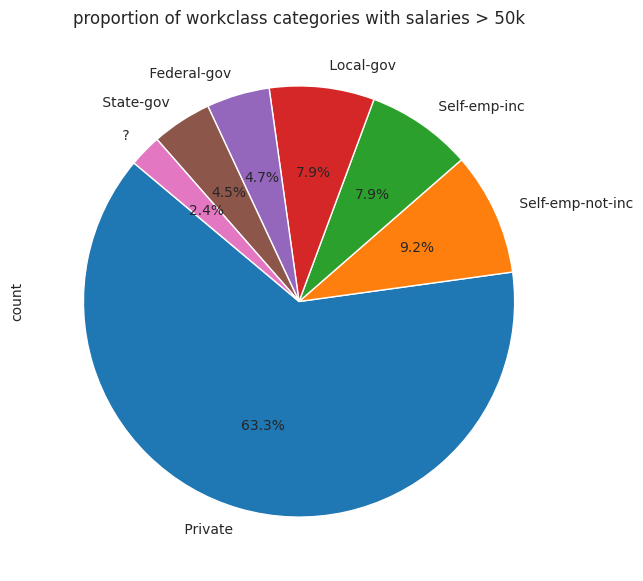

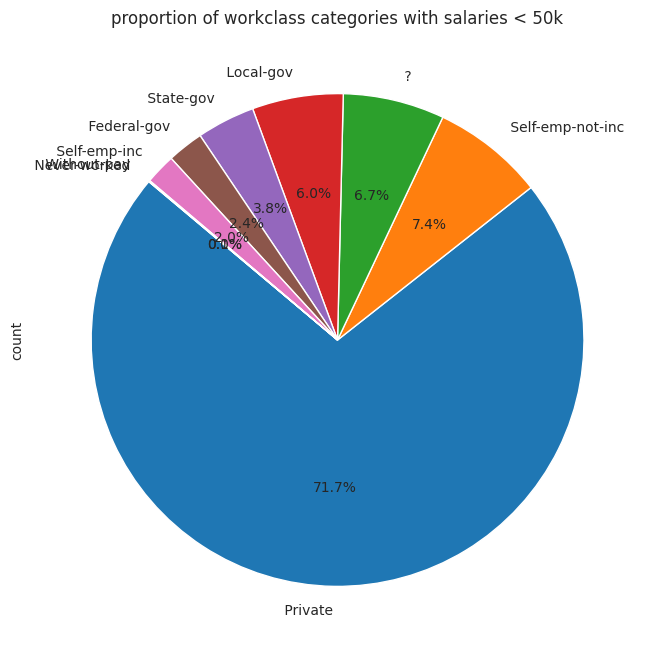

In [16]:
# pie chart for workclass categories with salary greater than > 50k
plt.figure(figsize=(10, 7))
top_occupation['workclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('proportion of workclass categories with salaries > 50k')


# Ploting the pie chart for workclass categories less than 50k salary
plt.figure(figsize=(10, 8))
top_occupation_less50k['workclass'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('proportion of workclass categories with salaries < 50k')

Text(0.5, 1.0, 'WorkClass : education have less than 50k salary')

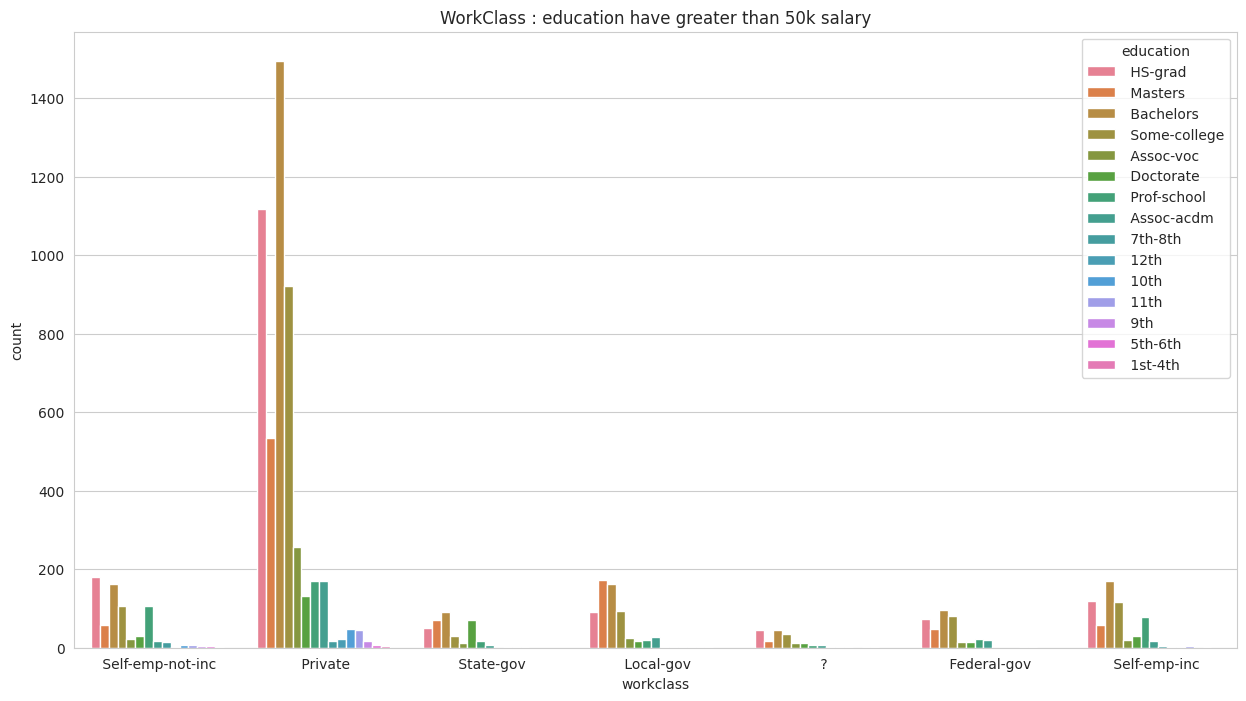

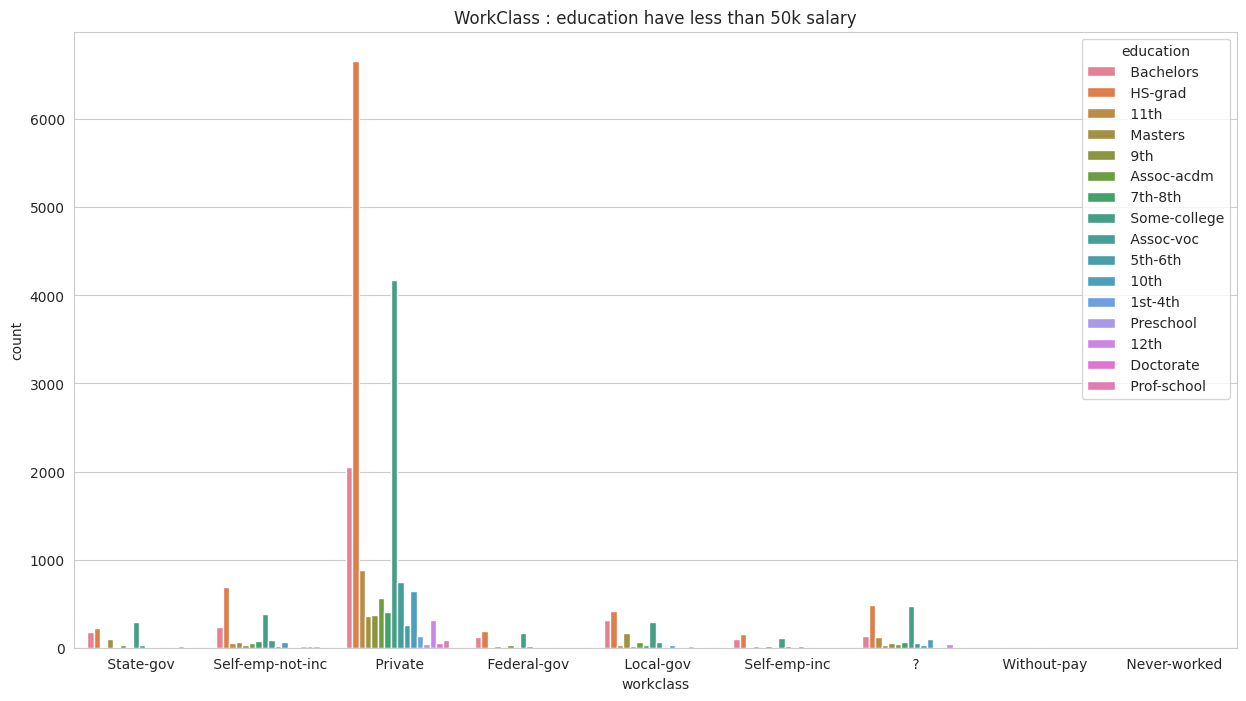

In [17]:

# Ploting the workclass to find whose salary is greater than 50k
plt.figure(figsize=(15, 8))
sns.countplot(x='workclass', data=above_50k, hue='education')
plt.title('WorkClass : education have greater than 50k salary')

# Ploting the workclass to find whose salary is less than 50k
plt.figure(figsize=(15, 8))
sns.countplot(x='workclass', data=lessthan_50k, hue='education')
plt.title('WorkClass : education have less than 50k salary')

Text(0.5, 1.0, 'gender greater than 50k salary 1:male, 0:female')

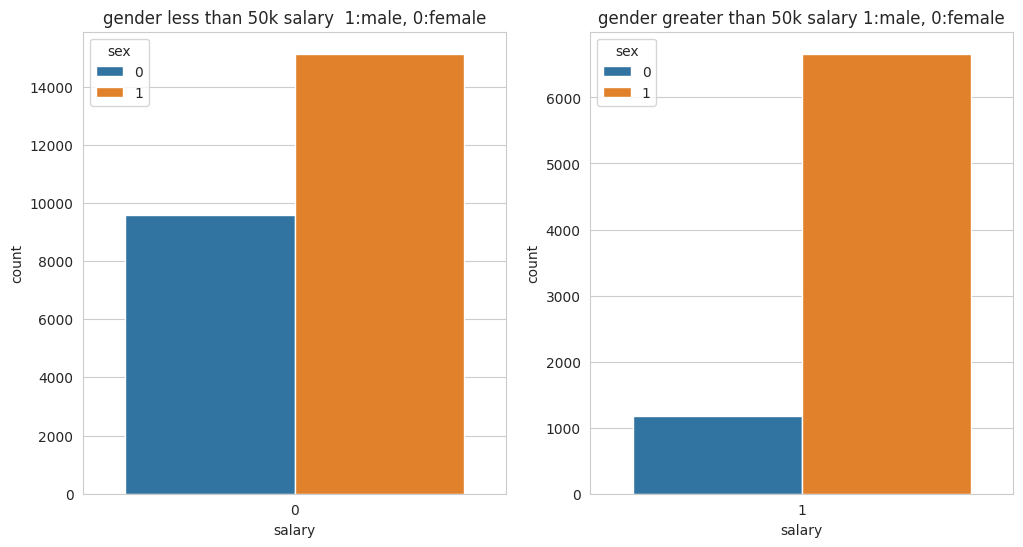

In [18]:
# Ploting Which gender have less than 50k salary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='salary', data=lessthan_50k, hue='sex')
plt.title('gender less than 50k salary  1:male, 0:female')

# Ploting Which gender have greater than 50k salary
plt.subplot(1, 2, 2)
sns.countplot(x='salary', data=above_50k, hue='sex')
plt.title('gender greater than 50k salary 1:male, 0:female')

In [19]:

def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_='upper right'):
    """_summary_

    Args:
        dataframe (_type_): _description_
        title_ (_type_): _description_
        size_ (tuple, optional): _description_. Defaults to (18, 10).
        rot_ (int, optional): _description_. Defaults to 0.
        legend_ (str, optional): _description_. Defaults to 'upper right'.
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    annotate_stacked_bars(ax, textsize=14)

    plt.legend(['lessthan_50k', 'GreaterThan_50k'], loc=legend_)

    plt.ylabel('base (%)')
    plt.show()

def annotate_stacked_bars(ax, color='white', pad=0.99, textsize=13):
    """_summary_

    Args:
        ax (_type_): _description_
        color (str, optional): _description_. Defaults to 'white'.
        pad (float, optional): _description_. Defaults to 0.99.
        textsize (int, optional): _description_. Defaults to 13.
    """

    for p in ax.patches:

        value = str(round(p.get_height(), 1))

        if value == '0.0':
            continue

        ax.annotate(
            value,
            ((p.get_x() + p.get_width() / 2)*pad-0.05, (p.get_y() + p.get_height() / 2)*pad),
            color=color,
            size=textsize
        )

def plot_distribution(dataframe, ax, column, bins_=50):
    """_summary_

    Args:
        dataframe (_type_): _description_
        ax (_type_): _description_
        column (_type_): _description_
        bins_ (int, optional): _description_. Defaults to 50.
        Plot Variable Distribution in a Stacked Histogram of GreaterThan50k or LessThan50k
    """
    # Creating a Temporal dataframe with the Data to be Plot
    temp = pd.DataFrame({
        "LessThan50k": df[df['salary'] == 0][column],
        'GreaterThan50k': df[df['salary'] == 1][column]
    })

    temp[['LessThan50k', 'GreaterThan50k']].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    ax.set_label(column)
    ax.ticklabel_formate(style='plain', axis='x')
# The Summary of My functions Above,,
# Summary of Functions:
# plot_stacked_bars:

   # Plots a stacked bar chart from a given DataFrame.
   # Adds annotations to the bars.
   # Customizes the legend, title, and axis labels.
# annotate_bars:

   # Adds text annotations to the bars in a bar chart.
   # The annotations display the height of each bar segment.
# plot_distribution:

  # Plots a stacked histogram to show the distribution of a specified column for two categories: 'Less than 50k' and 'Greater than 50k'.
  # Customizes the x-axis label and formatting.

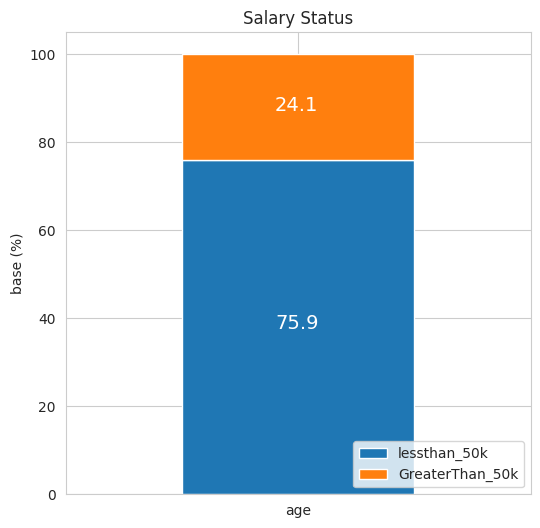

In [20]:
salary = df[['age', 'salary']]

salary.columns = ['age', 'salary']
salary_total = salary.groupby(salary['salary']).count()
salary_percentage = salary_total / salary_total.sum() * 100
plot_stacked_bars(salary_percentage.transpose(), 'Salary Status', (6, 6), legend_='lower right')

Machine Learning phase

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [22]:
# Encoding all the features
le = LabelEncoder()
# Making a copy of the dataframe anything make changes will not affect the origional one
df_model = df.copy()
columns_to_encode = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
for col in columns_to_encode:
  df_model[col] = le.fit_transform(df_model[col])

In [23]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,1,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,1,0,0,13,United-States,<=50K,0


In [24]:
df_model.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class,salary
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,<=50K,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,<=50K,0


In [25]:
# Spliting the Data into Feature Target set
X = df_model.drop(columns=['class', 'salary'])
y = df_model['salary']

# Separating the test set and Training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Making a pipelines
pipelines = {
    'logistic': Pipeline([('scale', StandardScaler()), ('clf', LogisticRegression())]),
    'svc': Pipeline([('scale', StandardScaler()), ('clf', SVC())]),
    'rfc': Pipeline([('scale', StandardScaler()), ('clf', RandomForestClassifier())]),
    'Dtree': Pipeline([('scale', StandardScaler()), ('clf', DecisionTreeClassifier())])
}

# Training a models
result = {}
for name, pipe in pipelines.items():
  pipe.fit(X_train, y_train)
  y_pred = pipe.predict(X_test)
  # accuracy = accuracy_score(y_test, y_pred)
  cv_score = cross_val_score(pipe, X, y, cv=5, scoring='accuracy')
  result[name] = cv_score

# Displaying the result of all the accuracy of the models
for name, accuracy in result.items():
  print(f'{name}: {accuracy.mean()}')

logistic: 0.825036102431312
svc: 0.8481927988664516
rfc: 0.8565155787461176
Dtree: 0.8076533570545547


Testing the model on test DataFrame

In [26]:
!ls adult.test

adult.test


In [27]:
scaler = StandardScaler()

In [28]:
# The Best score That are giving us is RandomForestClassifier
X_train_scaled = scaler.fit_transform(X_train)
rf_classifier = RandomForestClassifier().fit(X_train_scaled, y_train)

In [29]:
# Loading the Test Data
test_df = pd.read_csv('adult.test', names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'])

In [30]:

# Defining the columns to be encoded (same as in the training data)
categorical_columns = ['age', 'workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'class']

# Convert Categorical Variables to numeric using the same label encoder fitted on training data
for col in categorical_columns:
  test_df[col] = le.fit_transform(test_df[col])

In [31]:
# Droping Some NaN values
test_df.dropna(inplace=True)

In [32]:
# Separating the features and target
X_test_new = test_df.drop(columns=['class'])
y_test_new = test_df['class']

# Standardizing the features using the same scaler fitted on training data
X_test_new_scaled = scaler.fit_transform(X_test_new)

# Making prediction on new test data
y_pred_new = rf_classifier.predict(X_test_new_scaled)
y_pred_prob = rf_classifier.predict_proba(X_test_new_scaled)[:, 1]

# Evaluating the model
accuracy_new = accuracy_score(y_test_new, y_pred_new)
print(f'accuracy on new test data: {accuracy_new * 100:.2f}%')

accuracy on new test data: 84.95%


Text(0.5, 1.0, 'Confusion_Matrix')

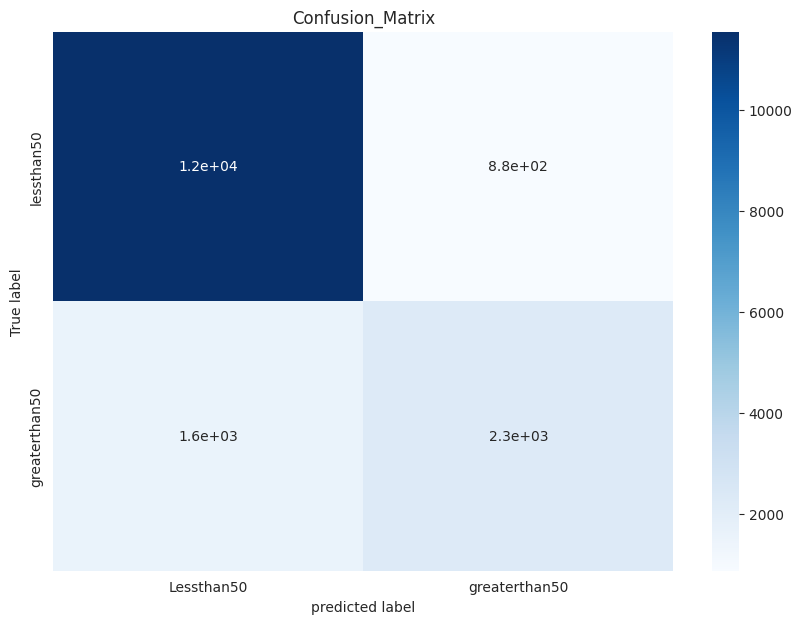

In [33]:
from sklearn.metrics import confusion_matrix

# Generating Confusion Matrix
cm = confusion_matrix(y_test_new, y_pred_new)

# Ploting the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['Lessthan50', 'greaterthan50'], yticklabels=['lessthan50', 'greaterthan50'])
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.title('Confusion_Matrix')

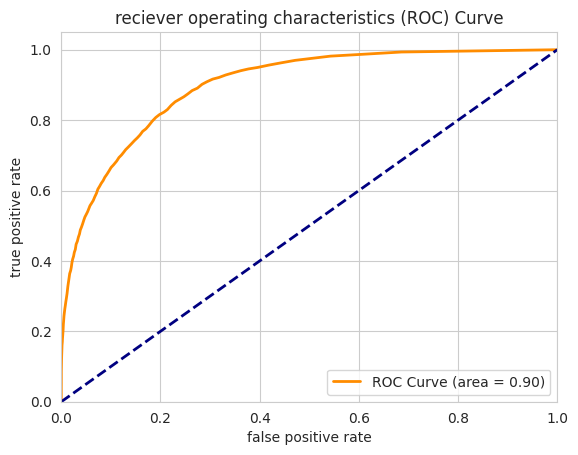

In [34]:
from sklearn.metrics import roc_curve, auc

# Calculating ROC AUC
fpr, tpr, threshold = roc_curve(y_test_new, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Ploting ROC AUC CURVE
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('reciever operating characteristics (ROC) Curve')
plt.legend(loc='lower right')